### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [4]:
data = pd.read_csv('data/coupons.csv')

In [ ]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [5]:
#summary
df = pd.DataFrame(data)
print(df.describe(include='all'))


            destination passanger weather   temperature   time        coupon  \
count             12684     12684   12684  12684.000000  12684         12684   
unique                3         4       3           NaN      5             5   
top     No Urgent Place     Alone   Sunny           NaN    6PM  Coffee House   
freq               6283      7305   10069           NaN   3230          3996   
mean                NaN       NaN     NaN     63.301798    NaN           NaN   
std                 NaN       NaN     NaN     19.154486    NaN           NaN   
min                 NaN       NaN     NaN     30.000000    NaN           NaN   
25%                 NaN       NaN     NaN     55.000000    NaN           NaN   
50%                 NaN       NaN     NaN     80.000000    NaN           NaN   
75%                 NaN       NaN     NaN     80.000000    NaN           NaN   
max                 NaN       NaN     NaN     80.000000    NaN           NaN   

       expiration  gender    age    mar

In [6]:
#missing values per columns
missingcount=df.isnull().sum()
print(missingcount)
#missing percentage
missingpercentage=df.isnull().mean() *100
print(missingpercentage)

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64
destination              0.000000
passanger                0.000000
weather                  0.000000
temperature              0.000000
time                     0.000000
coupon                   0.000000
exp

In [7]:
#Replacing NaN
df.replace("NaN", np.nan, inplace=True)

# Check for missing data
print(df.isnull().sum())



destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64


In [8]:
print("\nRows with missing data:")
print(df[df.isnull().any(axis=1)])


Rows with missing data:
           destination  passanger weather  temperature  time  \
0      No Urgent Place      Alone   Sunny           55   2PM   
1      No Urgent Place  Friend(s)   Sunny           80  10AM   
2      No Urgent Place  Friend(s)   Sunny           80  10AM   
3      No Urgent Place  Friend(s)   Sunny           80   2PM   
4      No Urgent Place  Friend(s)   Sunny           80   2PM   
...                ...        ...     ...          ...   ...   
12679             Home    Partner   Rainy           55   6PM   
12680             Work      Alone   Rainy           55   7AM   
12681             Work      Alone   Snowy           30   7AM   
12682             Work      Alone   Snowy           30   7AM   
12683             Work      Alone   Sunny           80   7AM   

                      coupon expiration  gender age      maritalStatus  ...  \
0            Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1               Coffee House         2h  Female 

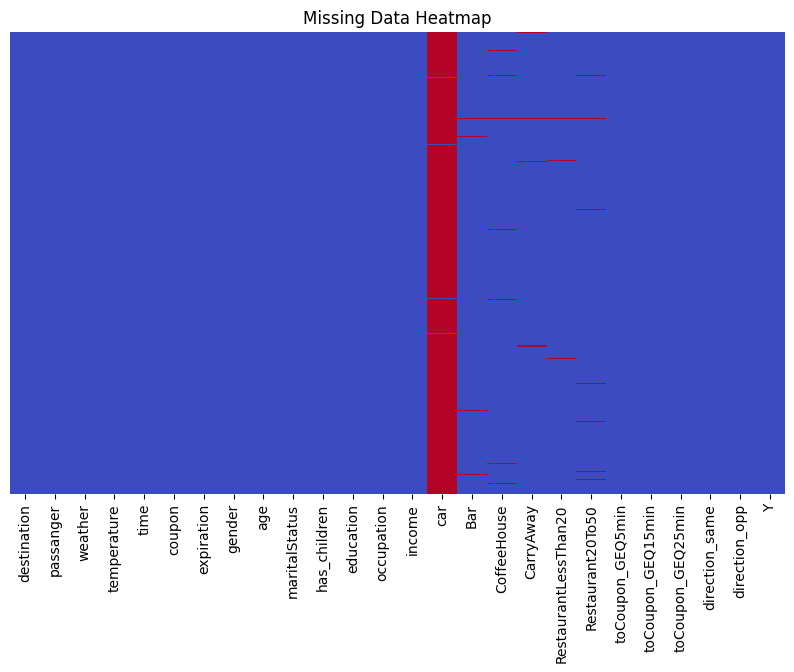

In [9]:
# Visualize missing data
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="coolwarm", yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()

3. Decide what to do about your missing data -- drop, replace, other...

In [10]:
#  1. Car is missing all the rows,so we can drop the car coloumn.
#  2. Few missing values in the Bar, CoffeeHouse, CarryAway, RestaurantLessThan20 and Restaurant20To50 we can fill them with "undefined"

# Drop the 'car' column
data = data.drop(columns=['car'])

# Fill missing values in missingcolumns with 'undefined'
missing_columns = ['Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']
data.loc[:, missing_columns] = data.loc[:, missing_columns].fillna('undefined')
# Display summary of cleaned data
data.isnull().sum()

,0
destination,0
passanger,0
weather,0
temperature,0
time,0
coupon,0
expiration,0
gender,0
age,0
maritalStatus,0


4. What proportion of the total observations chose to accept the coupon?



Total number of observations: 12684
Total number of accepted coupons: 7210
Proportion of the total observations that choose to accept the coupon: 56.84%
Count of accepted coupons:
Y
1    56.843267
0    43.156733
Name: proportion, dtype: float64


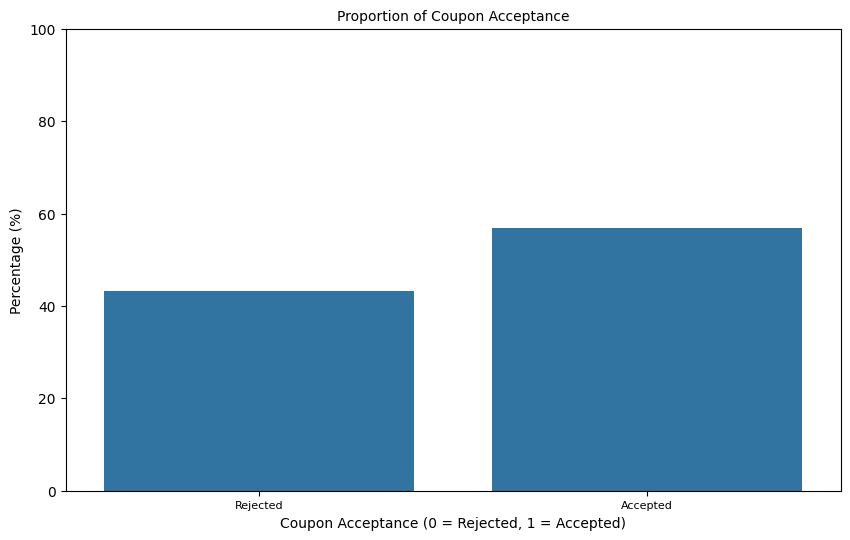

In [11]:
#Convert expiration day into hours
def coupon_expiration(expire):
    if expire == '1d':
        return 1 *24
    elif expire == '2h':
        return 2
    else:
        return 0
data['expiration'] = data['expiration'].apply(coupon_expiration)

#Total number of observation
total_observations= len(data)
print("Total number of observations:",total_observations)

#Total number of accepted coupons(Y=1)
total_accepted_coupons=len(data.query('Y==1'))
print("Total number of accepted coupons:",total_accepted_coupons)

#Proportion of the total observations that chose to accept the coupon
proportion_accepted=total_accepted_coupons/total_observations
print(f"Proportion of the total observations that choose to accept the coupon: {proportion_accepted:.2%}")

#Count of accepted coupons
accepted_count=data['Y'].value_counts(normalize=True) * 100
print("Count of accepted coupons:")
print(accepted_count)

#visualization of accepted coupons
plt.figure(figsize=(10, 6))
sns.barplot(x=accepted_count.index, y=accepted_count.values)
plt.title("Proportion of Coupon Acceptance", fontsize=10)
plt.xlabel("Coupon Acceptance (0 = Rejected, 1 = Accepted)", fontsize=10)
plt.ylabel("Percentage (%)", fontsize=10)
plt.xticks(ticks=[0, 1], labels=["Rejected", "Accepted"], fontsize=8)
plt.ylim(0, 100)
plt.show()

5. Use a bar plot to visualize the `coupon` column.

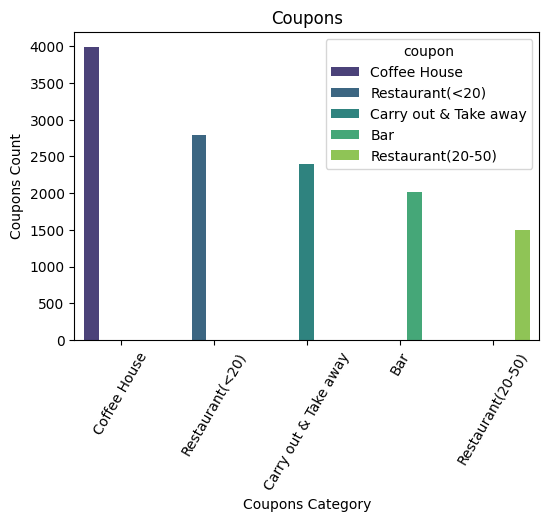

In [12]:
#Visualization on category of the coupons
plt.figure(figsize=(6, 4))
sns.barplot( x=data['coupon'].value_counts().index,y=data['coupon'].value_counts().values,palette="viridis", hue=data['coupon'].value_counts().index, dodge=True, legend=True)
plt.title("Coupons")
plt.ylabel('Coupons Count')
plt.xlabel('Coupons Category')
plt.xticks(rotation=60)
plt.show()

6. Use a histogram to visualize the temperature column.

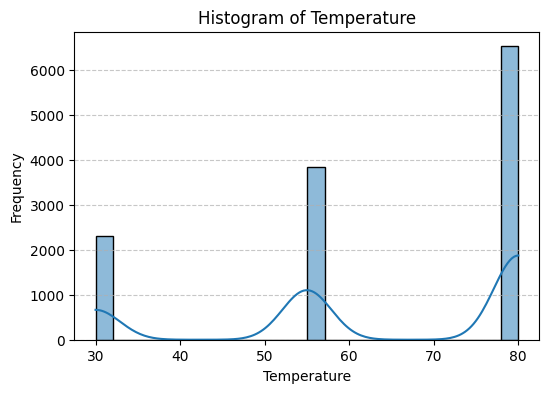

In [14]:
#visualize Histogram of temperature using seaborn
plt.figure(figsize=(6, 4))
#Added KDE
sns.histplot(data=df,kde=True,x='temperature',)
plt.title("Histogram of Temperature")
plt.xlabel('Temperature')
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [15]:
#New dataframe contains only Bar coupons data
df_bar=df[df['coupon']=='Bar']
#Display data for bar coupons
df_bar.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [16]:
#Total number of bar coupons
Total_bar_coupons=len(df_bar)
print("Total number of bar coupons:",Total_bar_coupons)

#Total number of accepted bar coupons
Total_accepted_bar_coupons=len(df_bar.query('Y==1'))
print("Total number of accepted bar coupons:",Total_accepted_bar_coupons)

#proportion of accepted bar coupons
proportion_accepted_bar_coupons=Total_accepted_bar_coupons/Total_bar_coupons
print(f"Proportion of accepted bar coupons: {proportion_accepted_bar_coupons:.2%}")


Total number of bar coupons: 2017
Total number of accepted bar coupons: 827
Proportion of accepted bar coupons: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [19]:
# Map the into two groups
df_bar.loc[:, "groups_visted_bar"] = df_bar["Bar"].map({
    "less1": "less than 3",
    "1~3": "less than 3",
    "4~8": "greater than 3",
    "gt8": "greater than 3"
})


# Acceptance rate for two groups
acceptance_rate = df_bar.groupby("groups_visted_bar")["Y"].mean().round(2)
print(acceptance_rate)

groups_visted_bar
greater than 3    0.77
less than 3       0.53
Name: Y, dtype: float64


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [20]:
#Cleaning data which having different datatype
df_bar.loc[df_bar['age'] == '50plus', 'age'] = int('51')
df_bar.loc[df_bar['age'] == 'below21', 'age'] =int('20')

# Drop rows with NaN in 'Age' column
df_bar  = df_bar.dropna(subset=['age'])
#Convert age column into integer datatype
df_bar['age'] = df_bar['age'].astype(np.int64)

#Drivers who go to a bar more than once a month and are over the age of 25
total_drivers_over25 = len(df_bar.query('age>=25 and Bar.isin(["less1","1~3","4~8","gt8"])'))
print("Total number of drivers over 25:", total_drivers_over25)

#Drivers who go to a bar more than once a month and are below the age of 25
total_drivers_under25 = len(df_bar.query('age<25 and Bar.isin(["1~3","4~8","gt8"])'))
print("Total number of drivers under 25:", total_drivers_under25)

#Accepentance rate for two drivers group
acceptance_rate_over25 = df_bar.query('age>=25 and Bar.isin(["1~3","4~8","gt8"])')['Y'].mean().round(2)
acceptance_rate_under25 = df_bar.query('age<25 and Bar.isin(["1~3","4~8","gt8"])')['Y'].mean().round(2)
print("Acceptance rate for drivers over 25:", acceptance_rate_over25)
print("Acceptance rate for drivers under 25:", acceptance_rate_under25)

Total number of drivers over 25: 870
Total number of drivers under 25: 176
Acceptance rate for drivers over 25: 0.7
Acceptance rate for drivers under 25: 0.67


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [21]:
#Driver who do the bar more then once a month.
driver_goes_frequently = df_bar['Bar'].isin(['1 to 3', '4 to 8', 'more than 8'])

#Driverwho do the bar more then once a month and passenger is not kids
driver_goes_frequently_and_nokids =  (df_bar['passanger'].str.contains(r'kid\(s\)',case=False))

##Driver who do the bar more then once a month and passenger is not kids and occupation is not farming, fishing, or forestry.
driver_goes_frequently_nokids_notfarming =  (df_bar['occupation'].str.contains(r'farming|fishing|forestry',case=False))

#driver group
driver_group=df_bar[driver_goes_frequently_and_nokids & driver_goes_frequently_and_nokids & driver_goes_frequently_nokids_notfarming]
#Other Driver group
Other_driver_group = df_bar[~(driver_goes_frequently_and_nokids & driver_goes_frequently_and_nokids & driver_goes_frequently_nokids_notfarming)]
driver_group['Y'].value_counts()

#Acceptance rate for two groups
acceptance_rate_driver_goes_frequently = driver_group['Y'].mean().round(2)
acceptance_rate_Other_driver_group = Other_driver_group['Y'].mean().round(2)
print("Acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and  had occupations other than farming, fishing, or forestry:", acceptance_rate_driver_goes_frequently)
print("Acceptance rate for other drivers:", acceptance_rate_Other_driver_group)


Acceptance rate for drivers who go to bars more than once a month and had passengers that were not a kid and  had occupations other than farming, fishing, or forestry: 0.33
Acceptance rate for other drivers: 0.41


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [30]:
#Group1 - go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
group1 = df_bar[df_bar['Bar'].isin(['1 to 3', '4 to 8', 'more than 8'])
                 & (df_bar['passanger'].str.contains(r'kid\(s\)',case=False))
                 & (df_bar['maritalStatus'] != 'widowed')
                ]
#Group1 - go to bars more than once a month and are under the age of 30 OR
group2 = df_bar[df_bar['Bar'].isin(['1 to 3', '4 to 8', 'more than 8'])
                 & (df_bar['age']<30)
             ]
#Group3 -   go to cheap restaurants more than 4 times a month and income is less than 50K.
group3 = df_bar[df_bar['RestaurantLessThan20'].isin(['4~8', 'gt8']) & df_bar['income'].isin(['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])]

#Join all the above groups
combined_group = pd.concat([group1, group2, group3])

#Filter all the groups
all_other_drivers_group=df_bar[~df_bar.index.isin(combined_group.index)]

#Acceptance rate for all drivers groups
print(f"Acceptance rate for drivers groups: {combined_group['Y'].mean():.2%}")
print(f"Acceptance rate for other drivers groups: {all_other_drivers_group['Y'].mean():.2%}")

Acceptance rate for drivers groups: 45.35%
Acceptance rate for other drivers groups: 40.11%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

Observation and Hypothese:


*  Age Factor: Drivers above the age 25,shows the higher rate of acceptance of the bar coupons.
*   Passenger:Drivers with no kids passenger and had occupations other than farming, fishing, or forestry had higher rate of acceptance of the coupons.
*   Frequent bar goers: Frequent drivers visit more then one month is having high rate of acceptance of the coupons
*   Martial status: Drivers who are not widowed have a higher acceptance rate for bar coupons.
*   Habits: Drivers who goes to cheaper restaurants more than 4 times a month and income is less than 50K have a higher acceptance rate for bar coupons.






### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [38]:
data1=pd.read_csv('data/coupons.csv')
df_coffee =data1[data1['coupon']=='Coffee House']
df_coffee.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
12,No Urgent Place,Kid(s),Sunny,55,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
15,Home,Alone,Sunny,80,6PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0


In [53]:
#Acceptance rate of coffee coupons
Total_coffee_coupons=len(df_coffee)
print("Total number of coffee coupons:",Total_coffee_coupons)

#Total number of accepted coffee coupons
Total_accepted_coffee_coupons=len(df_coffee.query('Y==1'))
print("Total number of accepted coffee coupons:",Total_accepted_coffee_coupons)

#Acceptance rate by age group of coffee coupons
print('____________________________________________________')
age_group = df_coffee.groupby("age")["Y"].mean().round(2)
print(age_group)

#acceptance rate by occupation group of coffee coupons
print('____________________________________________________')
occupation_group = df_coffee.groupby("occupation")["Y"].mean().round(2)
print(occupation_group)

#acceptance rate by frequent visitors group of coffee coupons
print('____________________________________________________')
df_coffee.loc[:, 'coffee_visit_group'] = df_coffee['CoffeeHouse'].map({
    'never': 'never',
    'less1': 'less than 1',
    '1~3': '1 to 3',
    '4~8': '4 to 8',
    'gt8': 'more than 8'
})
frequent_visitors_group = df_coffee.groupby("coffee_visit_group")["Y"].mean().round(2)
print(frequent_visitors_group)

#acceptance rate by education
print('____________________________________________________')
education_group = df_coffee.groupby("education")["Y"].mean().round(2)
print(education_group)

#accepantance rate by temparature
print('____________________________________________________')
temperature_group = df_coffee.groupby("temperature")["Y"].mean().round(2)
print(temperature_group)

Total number of coffee coupons: 3996
Total number of accepted coffee coupons: 1995
____________________________________________________
age
21         0.52
26         0.51
31         0.48
36         0.47
41         0.50
46         0.51
50plus     0.42
below21    0.70
Name: Y, dtype: float64
____________________________________________________
occupation
Architecture & Engineering                   0.56
Arts Design Entertainment Sports & Media     0.51
Building & Grounds Cleaning & Maintenance    0.73
Business & Financial                         0.48
Community & Social Services                  0.35
Computer & Mathematical                      0.50
Construction & Extraction                    0.48
Education&Training&Library                   0.44
Farming Fishing & Forestry                   0.55
Food Preparation & Serving Related           0.45
Healthcare Practitioners & Technical         0.74
Healthcare Support                           0.62
Installation Maintenance & Repair           

[Text(0, 0, 'Associates degree'),
 Text(1, 0, 'Bachelors degree'),
 Text(2, 0, 'Graduate degree (Masters or Doctorate)'),
 Text(3, 0, 'High School Graduate'),
 Text(4, 0, 'Some High School'),
 Text(5, 0, 'Some college - no degree')]

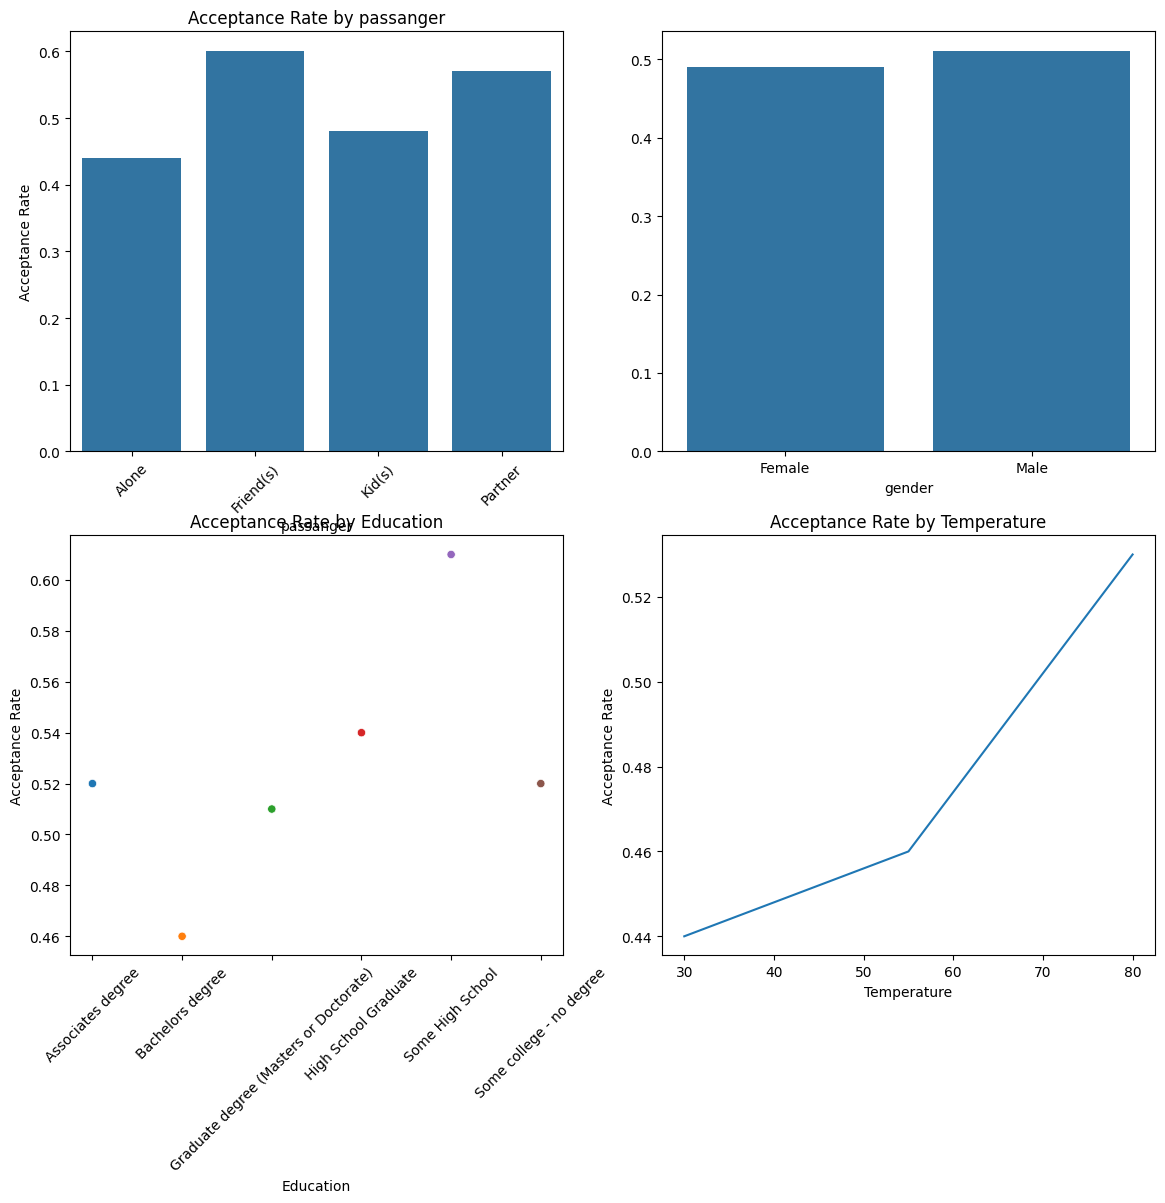

In [99]:
#visualization of  acceptance rate of coffee coupons

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
sns.barplot(
    ax=axes[0, 0],
    x=df_coffee.groupby("passanger")["Y"].mean().round(2).index,
    y=df_coffee.groupby("passanger")["Y"].mean().round(2).values
)
axes[0, 0].set_title("Acceptance Rate by passanger")
axes[0, 0].set_xlabel("passanger")
axes[0, 0].set_ylabel("Acceptance Rate")
axes[0,0].set_xticks(range(len(df_coffee.groupby("passanger")["Y"].mean().round(2))))
axes[0,0].set_xticklabels(df_coffee.groupby("passanger")["Y"].mean().round(2).index, rotation=45)

sns.barplot(
    ax=axes[0, 1],
    x=df_coffee.groupby("gender")["Y"].mean().round(2).index,
    y=df_coffee.groupby("gender")["Y"].mean().round(2).values
)

sns.lineplot(
    ax=axes[1, 1],
    x=df_coffee.groupby("temperature")["Y"].mean().round(2).index,
    y=df_coffee.groupby("temperature")["Y"].mean().round(2).values
)
axes[1, 1].set_title("Acceptance Rate by Temperature")
axes[1, 1].set_xlabel("Temperature")
axes[1, 1].set_ylabel("Acceptance Rate")

sns.scatterplot(
    ax=axes[1,0],
    x=df_coffee.groupby("education")["Y"].mean().round(2).index,
    y=df_coffee.groupby("education")["Y"].mean().round(2).values,
    hue=df_coffee.groupby("education")["Y"].mean().round(2).index,
    legend=False
)
axes[1, 0].set_title("Acceptance Rate by Education")
axes[1, 0].set_xlabel("Education")
axes[1, 0].set_ylabel("Acceptance Rate")
axes[1, 0].set_xticks([0, 1, 2, 3])
axes[1, 0].set_xticklabels(["High School", "Bachelor's Degree", "Associates Degree", "Graduate Degree"])
axes[1, 0].set_xticks(range(len(education_group)))
axes[1, 0].set_xticklabels(education_group.index, rotation=45)




Key Observations

*   Gender acceptance rate:
      Females has high acceptance rate of the coupons more than males.
*   Temperature vs Acceptance rate:
      Warmer temperature has high acceptance rate of the coupons,visit coffehouse for refreshing or for a break.
*   Education vs Acceptance rate:
      Higher educated has high acceptance rate of the coupons,visited coffehouse for more
*   Passenger with friends and patners has high acceptance rate of the coupons.

